In [1]:
import os
from os import path
import pandas as pd
import time
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import sklearn.model_selection as sk

C:\Users\aalmans8\Anaconda3\envs\tf-gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def getNormed(this_array, set_to_int = True):
    this_max = this_array.max()
    this_min = this_array.min()
    new_var = this_array.copy()

    new_var = (new_var - this_min)/(this_max - this_min)*255

    if set_to_int:
        return new_var
    return new_var

In [4]:
def getSamePadding(this_array):
    # Array to be added as row
    row_to_be_added = this_array[70]
    # Adding row to numpy array
    result = np.vstack ((this_array, row_to_be_added) )
    
    # Array to be added as column
    column = this_array[:, 70]
    last_item = this_array[70, 70]
    
    # Adding column to numpy array
    column_to_be_added = np.append(column, last_item)
    
    # stack column to numpy array
    new_img = np.column_stack((result, column_to_be_added))
    return new_img

In [6]:
# collect all images for training
image_folder = r'\Users\aalmans8\Documents\VAE\images_1332'
image_array = []
noduleID_array = []
print(image_folder)

for dir1 in os.listdir(image_folder):
    print(dir1)
    if not dir1.startswith('.'):
        for file in os.listdir(os.path.join(image_folder, dir1)):
            #print(file)
            noduleID = file.split('.')[0]
            if not file.startswith('.'):
                noduleID = int(noduleID)
                noduleID_array.append(noduleID)
                temp_image = np.loadtxt(os.path.join(image_folder, dir1,file))
                temp_image = getNormed(temp_image)
                enlarged_img = getSamePadding(temp_image)
                image_array.append(enlarged_img)

\Users\aalmans8\Documents\VAE\images_1332
.DS_Store
Malignancy_1
Malignancy_2
Malignancy_3
Malignancy_4
Malignancy_5


In [7]:
images = np.array(image_array)

In [8]:
images.shape

(1332, 72, 72)

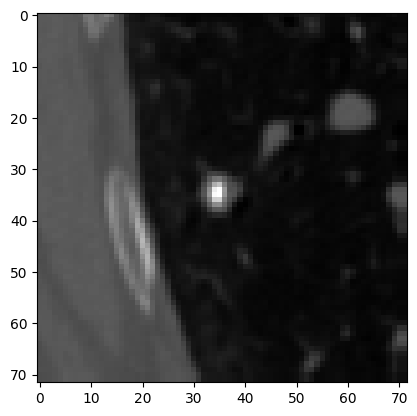

In [9]:
plt.imshow(images[0], cmap='gray')

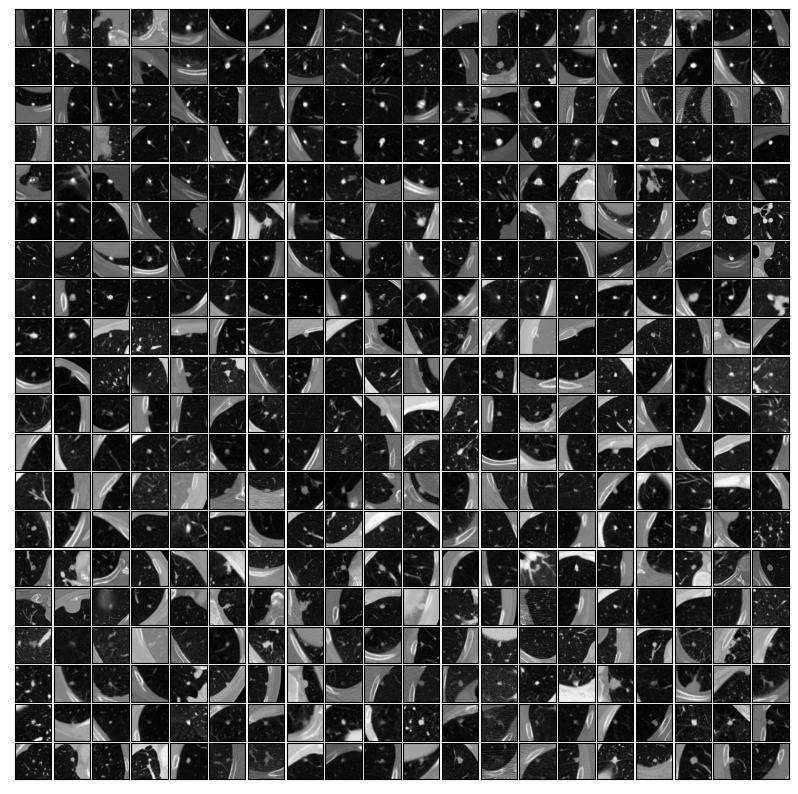

In [10]:
fig, axes = plt.subplots(20,20,figsize=(10,10),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.06, wspace=0.03))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap='gray')

In [11]:
pca_data = images.reshape(images.shape[0],72*72)

In [12]:
pca_data.shape

(1332, 5184)

In [13]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.8)
faces_pca.fit(pca_data)

PCA(n_components=0.8)

In [14]:
len(faces_pca.components_)

16

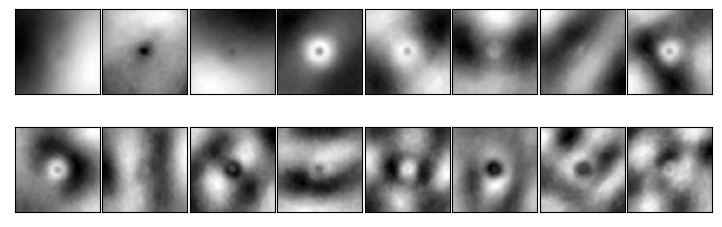

In [15]:
fig, axes = plt.subplots(2,8,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.04, wspace=0.03))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(72,72),cmap="gray")

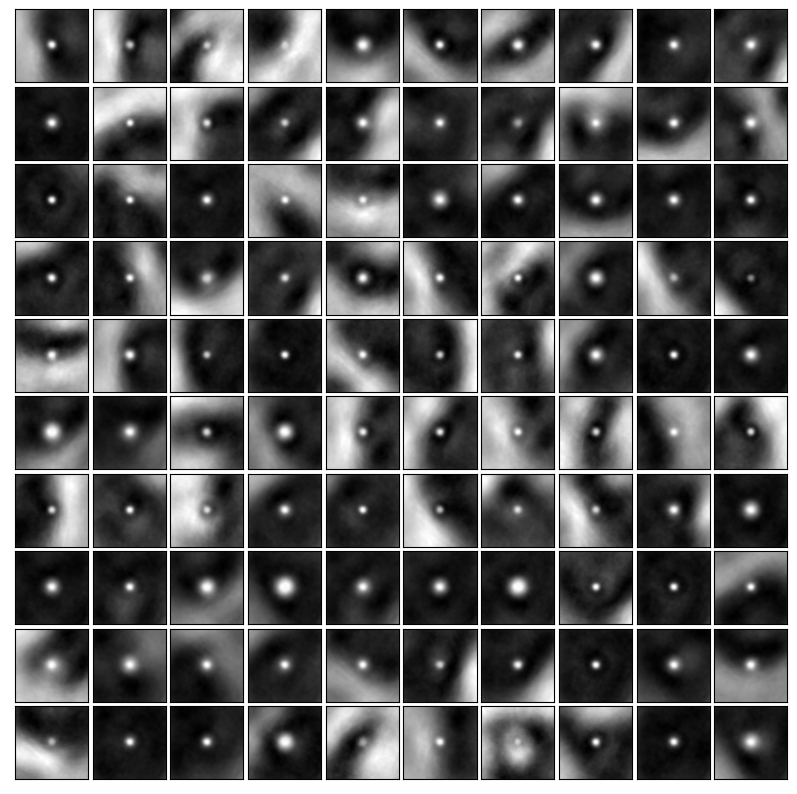

In [16]:
components = faces_pca.transform(pca_data)
projected = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(10,10), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.06, wspace=0.03))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(72,72),cmap="gray")